# 자연어 처리 - 전처리  

자연어 처리는 일반적으로 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화의 과정을 거친다  
  
1. 토큰화  

In [27]:
# spacy 로 토크나이즈
# !pip install spacy
import spacy

spacy_en = spacy.blank("en")

en_text = "A Dog Run back corner near spare bedrooms"

def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))


ko_text = "오늘 나는 학교에 간다"
spacy_en.tokenizer(ko_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


오늘 나는 학교에 간다

In [28]:
# NLTK 로 토크나이즈
# !pip install nltk
import nltk

nltk.download('punkt') #컨피그 파일 다운로드

from nltk.tokenize import word_tokenize


print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Playdata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# split()으로 토크나이즈
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


2. 형태소 토큰화

In [1]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [ ]:
!pip install JPype1‑1.3.0‑cp39‑cp39‑win_amd64.whl

In [30]:
import tweepy
tweepy.__version__

'3.10.0'

In [ ]:
# tweepy 다운 그래이드
!pip install tweepy==3.10.0

In [1]:
# pip install tweepy
#  pip install konlpy
# 1. 에러시 자바홈확인
# 2. https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서 버전에 맞는 파일 다운로드
# pip install JPype1‑1.3.0‑cp39‑cp39‑win_amd64.whl --force-reinstall --user
# 3. C:\Users\Playdata\AppData\Local\Programs\Python\Python39\Lib\site-packages\konlpy\jvm.py
# folder_suffix 아래의 # Java sources 밑에 있는 *표, # Twitter (Okt) 마지막 줄의 *표 삭제
from konlpy.tag import Okt  
okt = Okt()  
token = okt.morphs("나는 자연어 처리를 배운다")  
print(token)


['나', '는', '자연어', '처리', '를', '배운다']


3. 문자 토큰화

In [2]:
en_text = "A Dog Run back corner near spare bedrooms"
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


4. 단어집합  생성  
  
단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미한다.  
  
실습을 위해서 깃허브에서 '네이버 영화 리뷰 분류하기' 데이터를 다운로드.  
네이버 영화 리뷰 데이터는 총 20만 개의 영화 리뷰를 긍정 1, 부정 0으로 레이블링한 데이터

In [15]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [16]:
len(data)

200000

In [17]:
sample_data = data[:100]

In [18]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

<ipython-input-18-2131f05301ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [19]:
from konlpy.tag import Okt  

okt = Okt()  

# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '을']

tokenized=[]
for sentence in sample_data['document']:
    temp = okt.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [20]:
print(tokenized[:10])

[['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'], ['디자인', '배우는', '학생', '외국', '디자이너', '그', '일군', '전통', '통해', '발전', '해가는', '문화', '산업', '부러웠는데', '사실', '우리나라', '에서도', '그', '어려운', '시절', '끝', '까지', '열정', '지킨', '노라노', '같은', '전통', '있어', '저', '같은', '사람', '꿈', '꾸고', '이뤄', '나갈', '수', '있다는', '것', '감사합니다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버릴께', '하나', '없음', '최고'], ['연기', '진짜', '개', '쩔구나', '지루할거라고', '생각', '했는데', '몰입', '해서', '봤다', '그래', '이런게', '진짜', '영화', '지'], ['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화'], ['사랑', '해본', '사람', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오나요', '나오면', '빠', '로', '보고', '싶음'], ['굿'], ['바보', '아니라', '병', '쉰', '인듯']]


In [21]:
a = np.hstack(tokenized)
a[:10]

array(['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ', '디자인', '배우는'],
      dtype='<U7')

In [22]:
# NLTK의 빈도수 계산 도구 FreqDist()
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 760


In [23]:
vocab['감동']  # tokenized에서 '감동'이라는 단어가 7번 등장

7

In [24]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [27]:
vocab

[('영화', 27),
 ('최고', 10),
 ('적', 10),
 ('너무', 10),
 ('내', 9),
 ('정말', 8),
 ('때', 7),
 ('그', 7),
 ('진짜', 7),
 ('생각', 7),
 ('감동', 7),
 ('본', 7),
 ('다', 7),
 ('까지', 6),
 ('사람', 6),
 ('수', 6),
 ('연기', 6),
 ('로', 6),
 ('할', 6),
 ('만', 6),
 ('봤는데', 6),
 ('지금', 5),
 ('다시', 5),
 ('ㅋㅋ', 5),
 ('같은', 5),
 ('저', 5),
 ('부터', 5),
 ('왜', 5),
 ('에서', 5),
 ('마음', 5),
 ('거', 5),
 ('뭐', 5),
 ('중', 5),
 ('보고', 4),
 ('사실', 4),
 ('나', 4),
 ('평점', 4),
 ('요', 4),
 ('말', 4),
 ('못', 4),
 ('하는', 4),
 ('어릴', 3),
 ('봐도', 3),
 ('것', 3),
 ('했는데', 3),
 ('이다', 3),
 ('같다', 3),
 ('화', 3),
 ('인데', 3),
 ('네', 3),
 ('랑', 3),
 ('된', 3),
 ('인', 3),
 ('마지막', 3),
 ('대한', 3),
 ('명작', 3),
 ('속', 3),
 ('최고다', 3),
 ('재밌게', 3),
 ('봄', 3),
 ('친구', 3),
 ('라', 3),
 ('아', 3),
 ('느낌', 3),
 ('남자', 3),
 ('년', 3),
 ('여', 3),
 ('매력', 3),
 ('ㅎ', 3),
 ('게', 3),
 ('이런', 3),
 ('재밌습니다', 3),
 ('전통', 2),
 ('문화', 2),
 ('우리나라', 2),
 ('에서도', 2),
 ('끝', 2),
 ('하나', 2),
 ('없음', 2),
 ('개', 2),
 ('해서', 2),
 ('봤다', 2),
 ('지', 2),
 ('있는', 2),
 ('사랑', 2),
 

5. 각 단어에 고유 정수 부여  
  
enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴
  
인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 501까지 순차적으로 인덱스를 부여
  

In [25]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
#word_to_index: {'각':2, '고유':3, '정수':4....}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [28]:
word_to_index

{'영화': 2,
 '최고': 3,
 '적': 4,
 '너무': 5,
 '내': 6,
 '정말': 7,
 '때': 8,
 '그': 9,
 '진짜': 10,
 '생각': 11,
 '감동': 12,
 '본': 13,
 '다': 14,
 '까지': 15,
 '사람': 16,
 '수': 17,
 '연기': 18,
 '로': 19,
 '할': 20,
 '만': 21,
 '봤는데': 22,
 '지금': 23,
 '다시': 24,
 'ㅋㅋ': 25,
 '같은': 26,
 '저': 27,
 '부터': 28,
 '왜': 29,
 '에서': 30,
 '마음': 31,
 '거': 32,
 '뭐': 33,
 '중': 34,
 '보고': 35,
 '사실': 36,
 '나': 37,
 '평점': 38,
 '요': 39,
 '말': 40,
 '못': 41,
 '하는': 42,
 '어릴': 43,
 '봐도': 44,
 '것': 45,
 '했는데': 46,
 '이다': 47,
 '같다': 48,
 '화': 49,
 '인데': 50,
 '네': 51,
 '랑': 52,
 '된': 53,
 '인': 54,
 '마지막': 55,
 '대한': 56,
 '명작': 57,
 '속': 58,
 '최고다': 59,
 '재밌게': 60,
 '봄': 61,
 '친구': 62,
 '라': 63,
 '아': 64,
 '느낌': 65,
 '남자': 66,
 '년': 67,
 '여': 68,
 '매력': 69,
 'ㅎ': 70,
 '게': 71,
 '이런': 72,
 '재밌습니다': 73,
 '전통': 74,
 '문화': 75,
 '우리나라': 76,
 '에서도': 77,
 '끝': 78,
 '하나': 79,
 '없음': 80,
 '개': 81,
 '해서': 82,
 '봤다': 83,
 '지': 84,
 '있는': 85,
 '사랑': 86,
 '라면': 87,
 '처음': 88,
 '완전': 89,
 '굿': 90,
 '하': 91,
 '감정': 92,
 '라고': 93,
 '작품': 94,
 '없는': 95,
 

In [26]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음. line:['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ']
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)
print(encoded[:10])

[[43, 8, 35, 23, 24, 44, 148, 25], [149, 150, 151, 152, 153, 9, 154, 74, 155, 156, 157, 75, 158, 159, 36, 76, 77, 9, 160, 161, 78, 15, 162, 163, 164, 26, 74, 165, 27, 26, 16, 166, 167, 168, 169, 17, 170, 45, 171], [172, 173, 28, 174, 15, 175, 79, 80, 3], [18, 10, 81, 176, 177, 11, 46, 178, 82, 83, 179, 180, 10, 2, 84], [181, 182, 183, 184, 85, 185, 26, 2], [86, 186, 16, 87, 88, 28, 78, 15, 187, 85, 2], [89, 12, 188, 24, 44, 12], [81, 189, 190, 191, 192, 19, 35, 193], [90], [194, 195, 196, 197, 198]]


6. 문장들을 모두 동일한 길이로 바꾸기  
  
길이를 맞추기 위해 패딩

리뷰의 최대 길이 : 47
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 11.180000


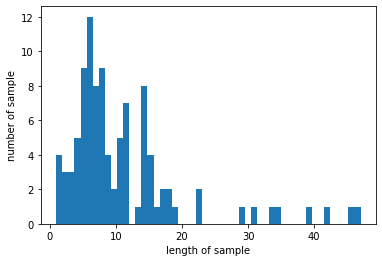

In [29]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [30]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다. [1]*개수

In [31]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 47
리뷰의 최소 길이 : 47
리뷰의 평균 길이 : 47.000000


In [32]:
encoded[:3]

[[43,
  8,
  35,
  23,
  24,
  44,
  148,
  25,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [149,
  150,
  151,
  152,
  153,
  9,
  154,
  74,
  155,
  156,
  157,
  75,
  158,
  159,
  36,
  76,
  77,
  9,
  160,
  161,
  78,
  15,
  162,
  163,
  164,
  26,
  74,
  165,
  27,
  26,
  16,
  166,
  167,
  168,
  169,
  17,
  170,
  45,
  171,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [172,
  173,
  28,
  174,
  15,
  175,
  79,
  80,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]]

7. 토치 텍스트 라이브러리  
  
파이토치(PyTorch)에서는 텍스트에 대한 여러 추상화 기능을 제공하는 자연어 처리 라이브러리 토치텍스트(Torchtext)를 제공  
  
* 파일 로드하기(File Loading) : 다양한 포맷의 코퍼스를 로드.  
* 토큰화(Tokenization) : 문장을 단어 단위로 분리.  
* 단어 집합(Vocab) : 단어 집합 생성.  
* 정수 인코딩(Integer encoding) : 전체 코퍼스의 단어들을 각각의 고유한 정수로 맵핑.  
* 단어 벡터(Word Vector) : 단어 집합의 단어들에 고유한 임베딩 벡터 생성. 랜덤값으로 초기화한 값일 수도 있고, 사전 훈련된 임베딩 벡터들을 로드할 수도 있다.  
* 배치화(Batching) : 훈련 샘플들 배치. 이 과정에서 패딩 작업(Padding)도 이루어진다.  
  
  

< 훈련 데이터와 테스트 데이터로 분리 >

In [1]:
import urllib.request
import pandas as pd

In [33]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x150e555afd0>)

In [34]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')

In [35]:
df

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0
...,...,...
49995,the people who came up with this are SICK AND ...,0
49996,"The script is so so laughable... this in turn,...",0
49997,"""So there's this bride, you see, and she gets ...",0
49998,Your mind will not be satisfied by this noÂbu...,0


In [36]:
train_df = df[:25000]
test_df = df[25000:]

In [37]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

< 필드 정의 >

In [38]:
#pip install torchtext
import torchtext 

# 필드 정의
TEXT = torchtext.legacy.data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True, # <== 이 부분을 True로 합니다.
                  fix_length=20)

LABEL = torchtext.legacy.data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

Field 생성자 파라메터  
  
* sequential : 시퀀스 데이터 여부. (True가 기본값)  
* use_vocab : 단어 집합을 만들 것인지 여부. (True가 기본값)  
* tokenize : 어떤 토큰화 함수를 사용할 것인지 지정. (string.split이 기본값)  
* lower : 영어 데이터를 전부 소문자화한다. (False가 기본값)  
* batch_first : 미니 배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지 여부. (False가 기본값)  
* is_target : 레이블 데이터 여부. (False가 기본값)  
* fix_length : 최대 허용 길이. 이 길이에 맞춰서 패딩 작업(Padding)이 진행된다.  
  
< 데이터셋 만들기 >

In [39]:
from torchtext.legacy.data import TabularDataset

# TabularDataset은 데이터를 불러오면서 필드에서 정의했던 토큰화 방법으로 토큰화를 수행합니다.
train_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', test='test_data.csv', format='csv',
        fields=[('text', TEXT), ('label', LABEL)], skip_header=True)



splits() 파라메터  
  
* path : 파일이 위치한 경로.  
* format : 데이터의 포맷.  
* fields : 위에서 정의한 필드를 지정. 첫번째 원소는 데이터 셋 내에서 해당 필드를 호칭할 이름, 두번째 원소는 지정할 필드.  
* skip_header : 데이터의 첫번째 줄은 무시  
  
< 단어 집합 만들기 >  
각 단어에 고유한 정수를 맵핑해주는 정수 인코딩

In [40]:
# 정의한 필드에 .build_vocab() 도구를 사용하면 단어 집합을 생성합니다.
TEXT.build_vocab(train_data, min_freq=10, max_size=10000) # 10,000개의 단어를 가진 단어 집합 생성


min_freq : 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가.  
max_size : 단어 집합의 최대 크기를 지정.

In [41]:
#단어 집합의 크기
len(TEXT.vocab)

10002

In [42]:
# 생성된 단어 집합 내의 단어들은 .stoi를 통해서 확인 가능
TEXT.vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x00000150E93D8E80>>,
            {'<unk>': 0,
             '<pad>': 1,
             'the': 2,
             'a': 3,
             'and': 4,
             'of': 5,
             'to': 6,
             'is': 7,
             'in': 8,
             'i': 9,
             'this': 10,
             'it': 11,
             'that': 12,
             '/><br': 13,
             'was': 14,
             'as': 15,
             'for': 16,
             'with': 17,
             'but': 18,
             'on': 19,
             'movie': 20,
             'his': 21,
             'not': 22,
             'are': 23,
             'you': 24,
             'film': 25,
             'have': 26,
             'he': 27,
             'be': 28,
             'at': 29,
             'one': 30,
             'by': 31,
             'an': 32,
             'they': 33,
             'from': 34,
             'who': 35,
             'all': 36,
       

< 토치텍스트의 데이터로더 만들기 >

In [46]:
from torchtext.legacy.data import Iterator

# 배치 크기를 정하고 첫번째 배치를 출력해보겠습니다.
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
batch_train1 = next(iter(train_loader)) # 첫번째 미니배치
test_loader = Iterator(dataset=test_data, batch_size = batch_size)
batch_test1 = next(iter(test_loader)) # 첫번째 미니배치

In [47]:
len(train_loader)

5000

In [48]:
batch_train1


[torchtext.legacy.data.batch.Batch of size 5]
	[.text]:[torch.LongTensor of size 5x20]
	[.label]:[torch.LongTensor of size 5]

In [49]:
len(test_loader)

5000

In [50]:
batch_test1


[torchtext.legacy.data.batch.Batch of size 5]
	[.text]:[torch.LongTensor of size 5x20]
	[.label]:[torch.LongTensor of size 5]

In [51]:
print(batch_train1.text)

tensor([[   9,  115,   43,    0,    4,    9,  115,   12,   11,  203,   29,   36,
            0,   18,   43,   38,  784,   44,   24,   62],
        [   9,   37,    2,  219,  172,   74,  668,    2,   77,  399,    5, 6202,
          229,    0, 2032, 5934,  114,    3,   56,  326],
        [   9, 4211,   10,   20,  456,   81,  509,  457, 5472,   76,    9,  412,
            6,   66,   79,    2, 1009,  917,    6,    0],
        [ 148, 5198, 4569,    7,   37,  599,    3,    0,    8,    0,    0,    0,
            0, 5003,    9,   14,  105,  188,    6,  109],
        [  48,    2, 2532,    7,   10, 7110, 2272,    0,  175,    6, 2609,   36,
         1457, 2764,   15,  560,   15,   57, 3029,    6]])


< 한국어 처리 >  
  
데이터 다운로드

In [1]:
import urllib.request
import pandas as pd

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x1b78c9a8e80>)

In [3]:
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')

In [4]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
len(train_df)

150000

In [6]:
len(test_df)

50000

< 필드 정의 >

In [14]:
from torchtext.legacy import data # torchtext.data 임포트
from konlpy.tag import Okt

In [15]:
tokenizer = Okt()  

# 필드 정의
ID = data.Field(sequential = False,
                use_vocab = False) # 실제 사용은 하지 않을 예정

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [16]:
from torchtext.legacy.data import TabularDataset

In [17]:
train_data, test_data = TabularDataset.splits(
        path='.', train='ratings_train.txt', test='ratings_test.txt', format='tsv',
        fields=[('id', ID), ('text', TEXT), ('label', LABEL)], skip_header=True)

In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[0]

< 단어 집합 만들기 >

In [ ]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [ ]:
len(TEXT.vocab)

In [ ]:
TEXT.vocab.stoi

< 토치텍스트의 데이터로더 만들기 >

In [ ]:
from torchtext.data import Iterator

In [ ]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

In [ ]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.text)